In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import matplotlib.style as style

In [2]:
data=pd.read_csv('data/hour.csv',parse_dates=['dteday'])

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


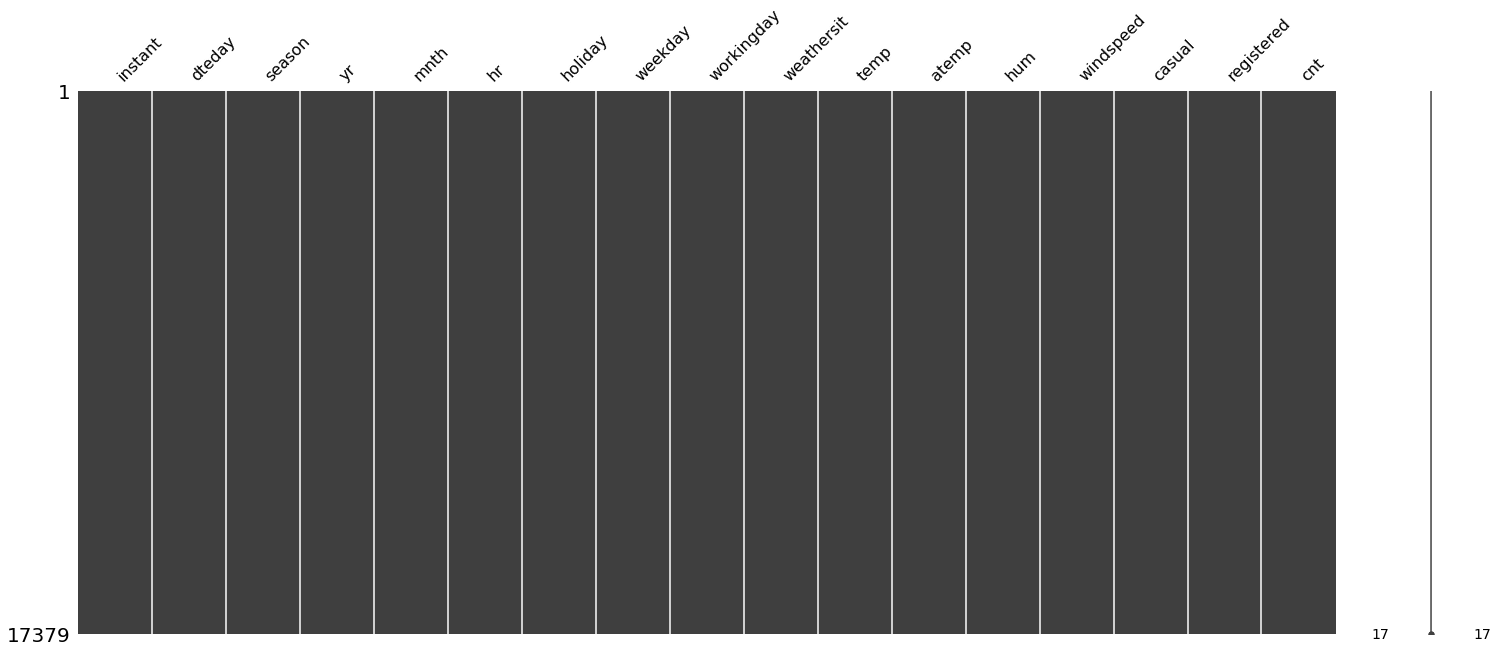

In [4]:
msno.matrix(data)

In [5]:
#No missing Data:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

In [6]:
data.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [7]:
data.shape

(17379, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

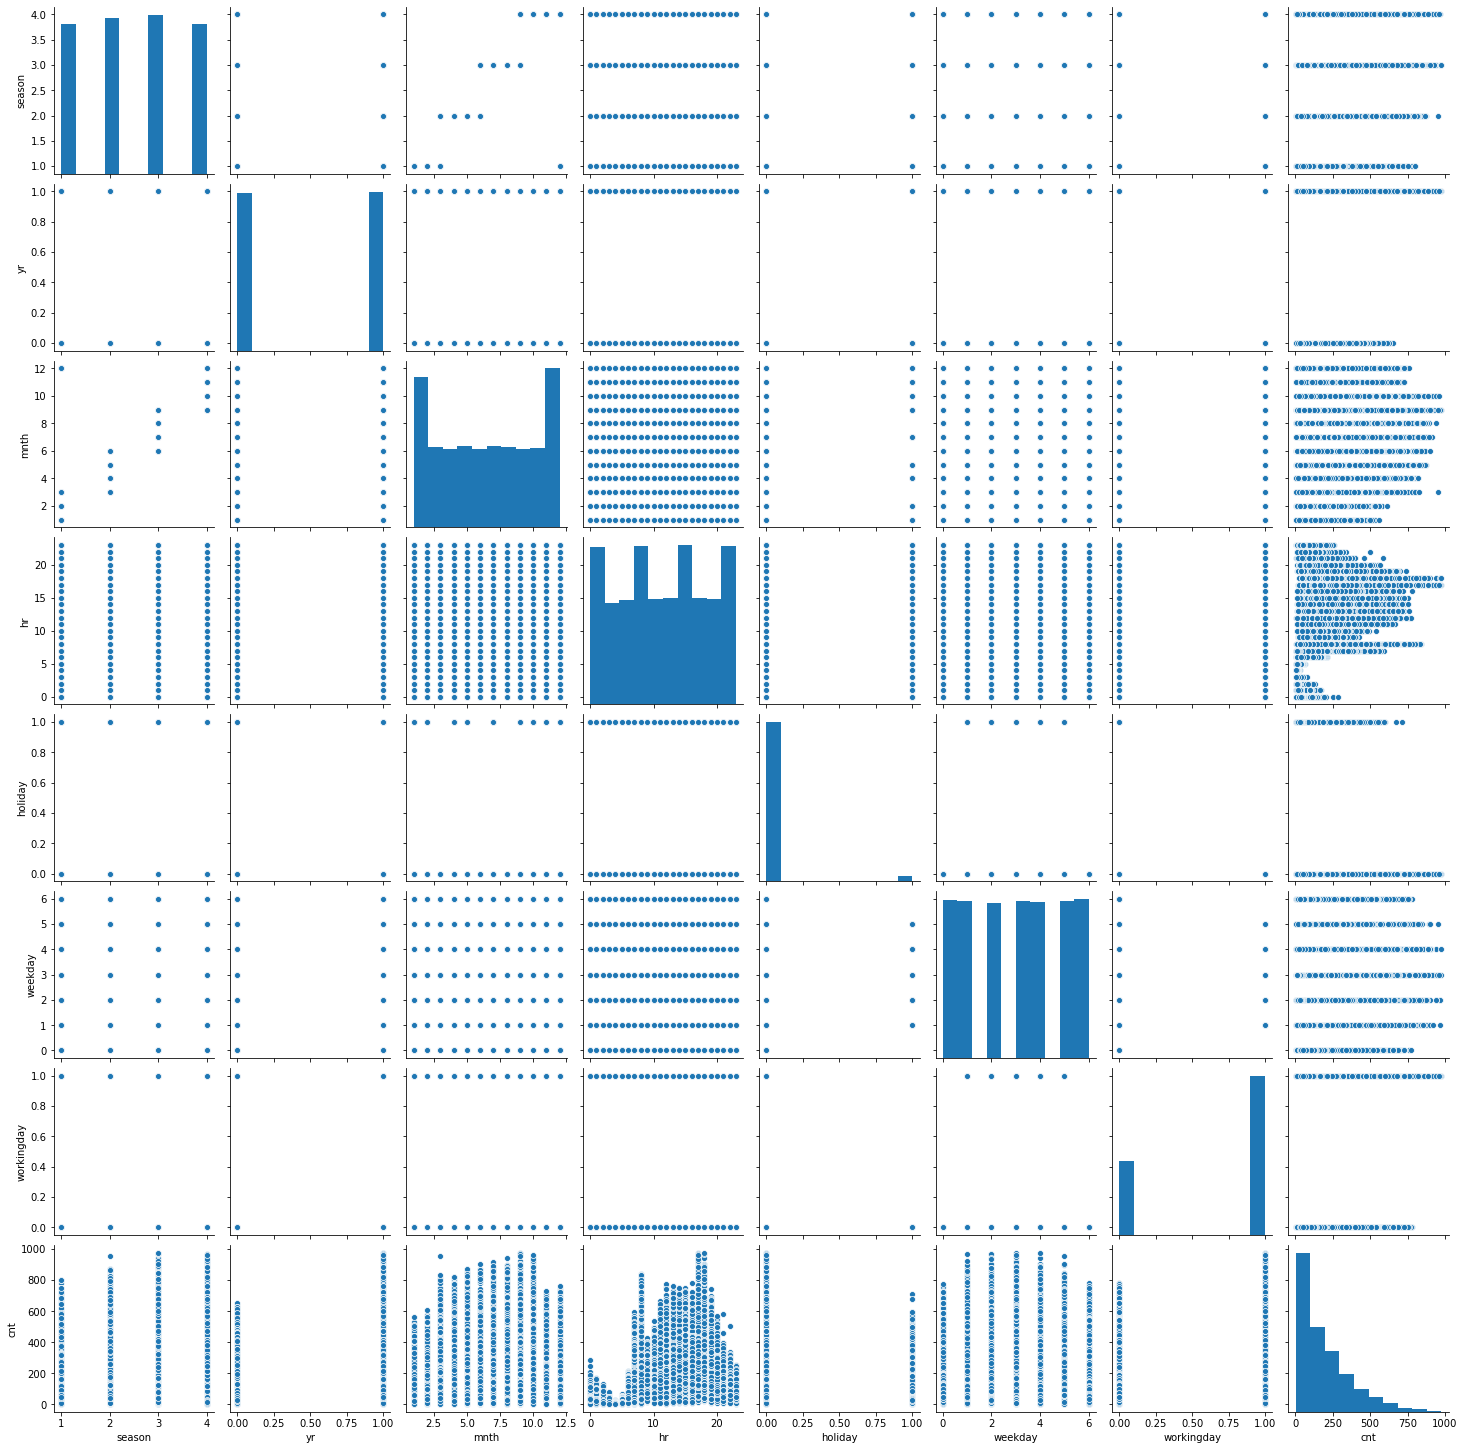

In [9]:
sns.pairplot(data[['season','yr','mnth','hr','holiday','weekday','workingday','cnt']],kind='scatter')
plt.show()

In [10]:
# ['season','yr','mnth','hr','holiday','weekday','workingday','cnt']
# Only hr is having some how relation with target.

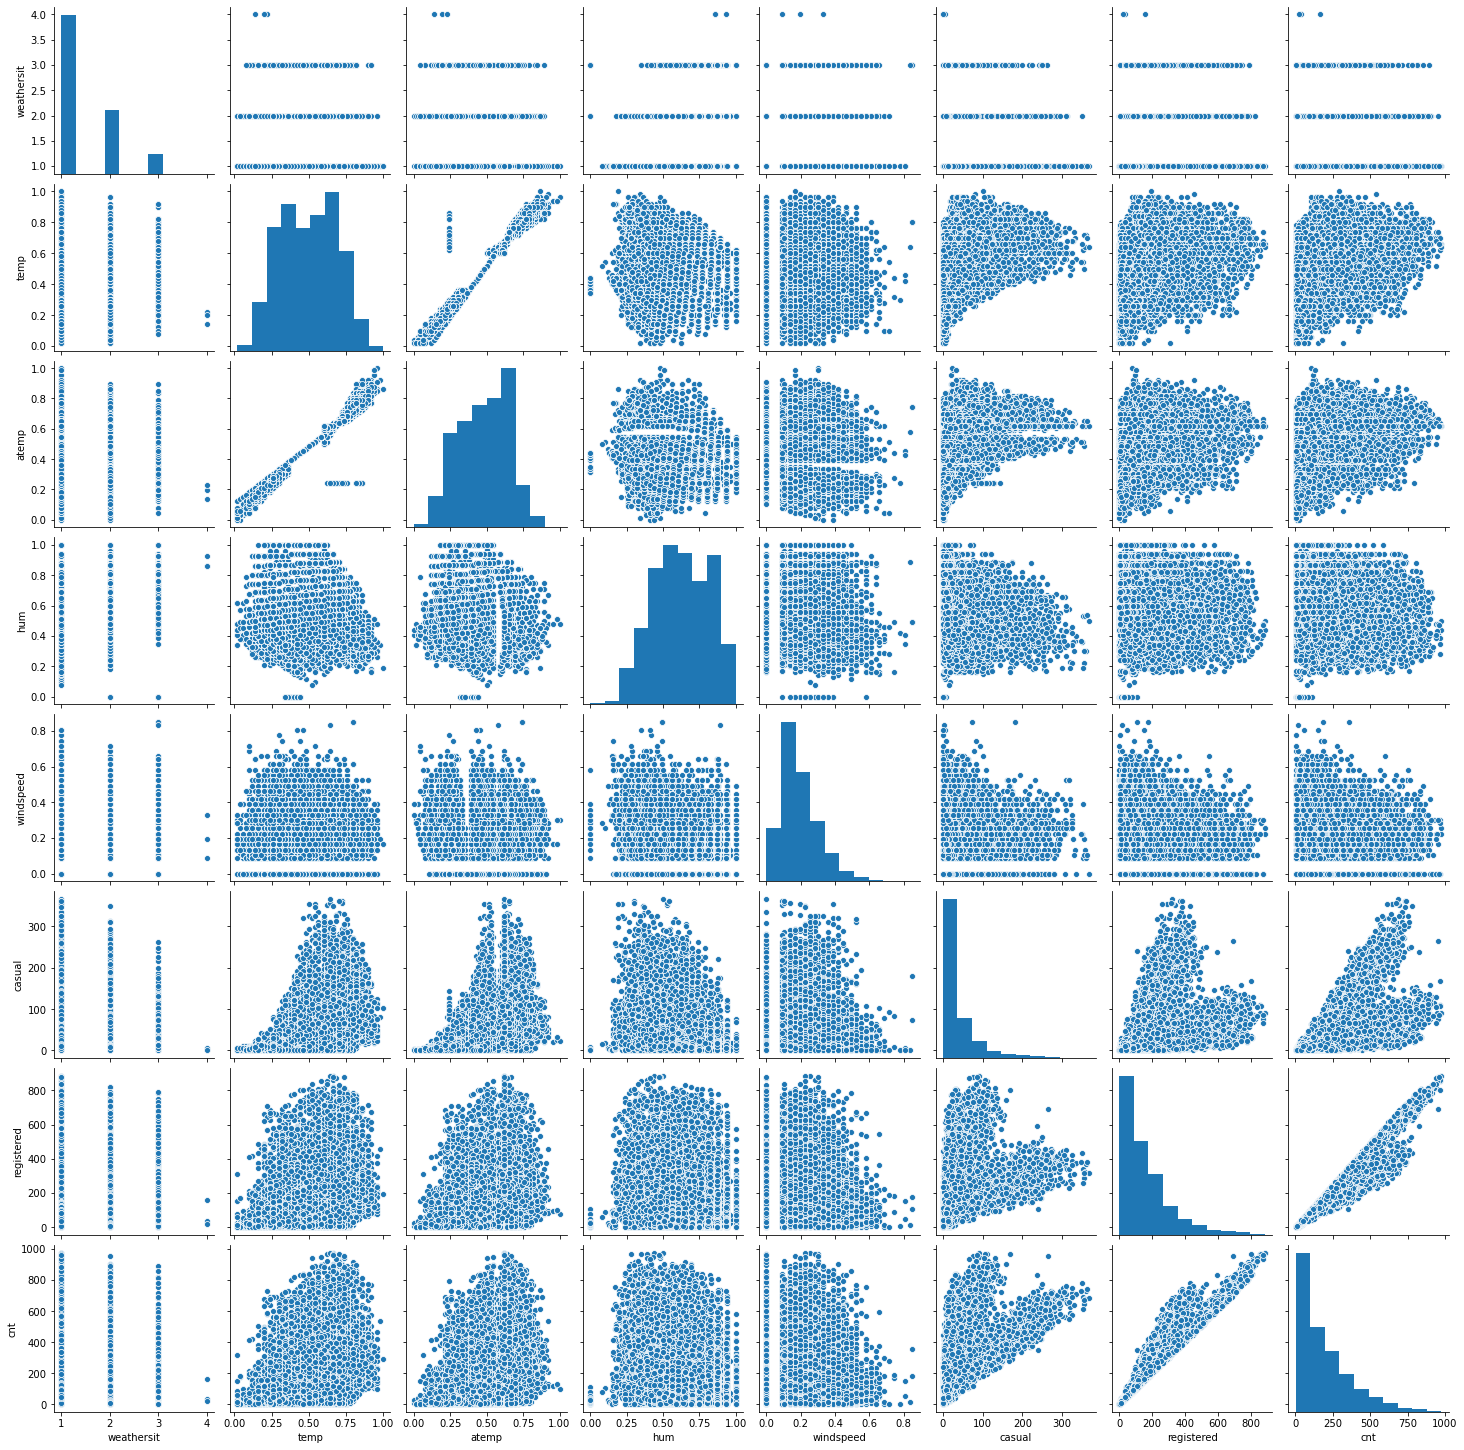

In [11]:
sns.pairplot(data[['weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']],kind='scatter')
plt.show()

In [12]:
# ['weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
# atemp,temp have a linear relation eachother. Registered and casual good linear relation with target.

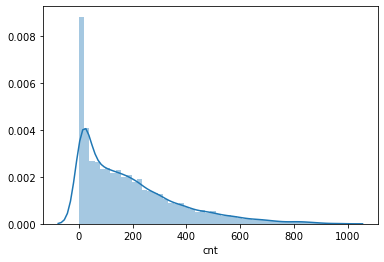

In [13]:
sns.distplot(data['cnt'])

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([  1,   1,   1, ..., 970, 976, 977], dtype=int64)),
 (169.56208274455796, 189.4630876345015, 0.9346293252087196))

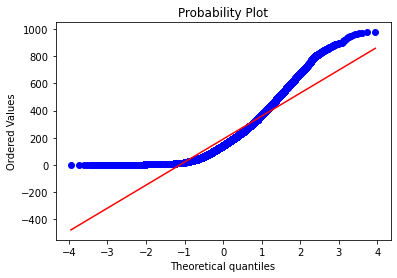

In [14]:
stats.probplot(data['cnt'],plot=plt)

In [15]:
# Multiple Outliers and data is positive skewed:

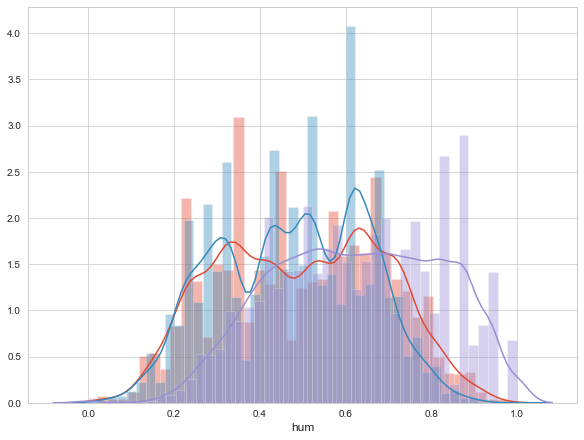

In [136]:
fig = plt.figure(constrained_layout=True, figsize=(8,6))
for col in ['temp','atemp','hum']:
    sns.distplot(data[col])

In [17]:
# The distribubtion seems to be some how almost normal but not exactly. Skewness is there.

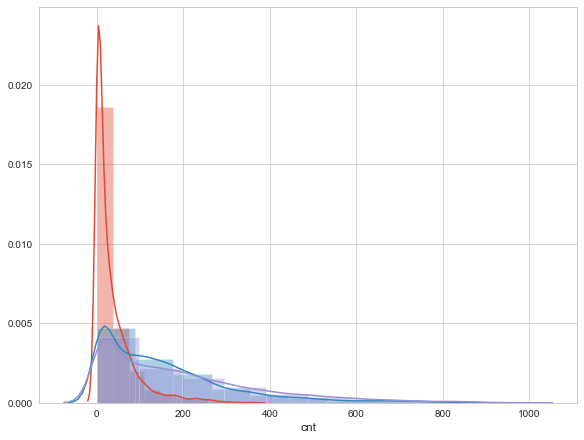

In [134]:
fig = plt.figure(constrained_layout=True, figsize=(8,6))
for col in ['casual','registered','cnt']:
    sns.distplot(data[col],bins=10)

In [137]:
# The distribution is not normal. Positive Skewed.
# For Outlier detection we can also use the BOXPLOT:

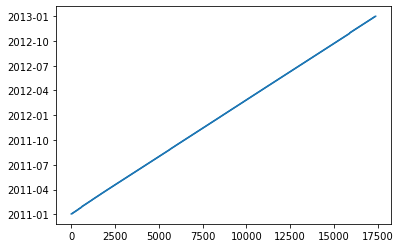

In [20]:
plt.plot(data['dteday'])

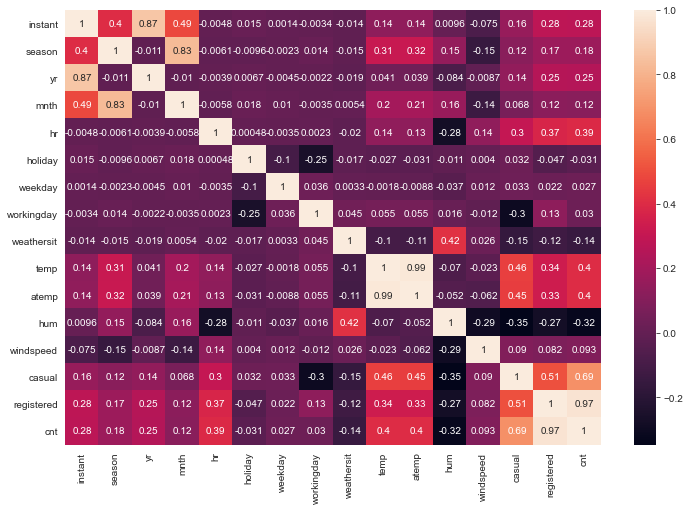

In [21]:
# Date is linear increasing:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(),annot=True)

In [108]:
# atemp and temp have strong positive correlation:
# windspeed and casual having multiple strong correlation with other features Better to remove.

## Feature Engineering:

In [92]:
f_data=pd.read_csv('data/hour.csv',parse_dates=['dteday'])

In [93]:
f_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [94]:
# Find categorical column:
f_data.dtypes[f_data.dtypes=='object']

Series([], dtype: object)

In [95]:
f_data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [96]:
f_data['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [97]:
f_data['mnth'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

In [98]:
f_data['hr'].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [99]:
f_data['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [100]:
f_data['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [101]:
f_data['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [102]:
f_data['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [103]:
# So total Categorical feature --> 'weekday','weathersit','hr','mnth','yr','season'
# Rest are already encoded
# Perform one hot encoding on multiple category:

In [104]:
f_data=pd.get_dummies(f_data,columns=['season'],drop_first=False,prefix='season')

In [105]:
f_data.head(2)

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0


In [106]:
f_data=pd.get_dummies(f_data,columns=['yr'],drop_first=False,prefix='year')
f_data=pd.get_dummies(f_data,columns=['mnth'],drop_first=False,prefix='month')
f_data=pd.get_dummies(f_data,columns=['hr'],drop_first=False,prefix='hour')
f_data=pd.get_dummies(f_data,columns=['weathersit'],drop_first=False,prefix='weather')
f_data=pd.get_dummies(f_data,columns=['weekday'],drop_first=False,prefix='weekday')

In [107]:
f_data.head(1)

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weather_2,weather_3,weather_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,1


In [109]:
f_data=f_data.drop(['windspeed','casual'],axis=1)

In [138]:
# atemp temp highly correlated:
f_data['comb_temp']=(f_data['temp']+f_data['atemp'])/2

In [139]:
f_data=f_data.drop(['temp','atemp'],axis=1)

## Model:

In [140]:
f_data.shape

(17379, 61)

In [141]:
f_data.head(1)

,instant,dteday,holiday,workingday,hum,registered,cnt,season_1,season_2,season_3,...,weather_3,weather_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,comb_temp
0,1,2011-01-01,0,0,0.81,13,16,1,0,0,...,0,0,0,0,0,0,0,0,1,0.26395


In [142]:
y=f_data['cnt'].values # Target Feature-Label
X=f_data.drop(['cnt','dteday'],axis=1).values # Features

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [145]:
linear_model=LinearRegression()

In [146]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [147]:
linear_model.score(X_train,y_train)

0.9735405428545256

In [148]:
linear_model.score(X_test,y_test)

0.9747582388544505

In [149]:
from sklearn.linear_model import Ridge

In [150]:
ridge_model=Ridge(alpha=0.1)

In [151]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [152]:
ridge_model.score(X_train,y_train)

0.9735405408656287

In [153]:
ridge_model.score(X_test,y_test)

0.9747580916672313